ЛР1 Разведочный анализ с использованием pandas

Булатова Ксения

Грппа: ПМИ - 24 НМ

**Для работы был выбран набор данных о здоровье сна и образе жизни**

Набор данных включает такие сведения, как пол, возраст, род занятий, продолжительность сна, качество сна, уровень физической активности, уровень стресса, категория ИМТ, артериальное давление, частота сердечных сокращений, количество пройденных шагов в день, а также наличие или отсутствие нарушений сна.

Этот набор данных можно использовать для решения задачи прогрназирования качества сна конкретного человека.

Данные для исследования [здесь](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [3]:
train = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
train.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Описание полей:**

1.   *Person ID* - идентификатор каждого человека(уникальный индекс).
2.   *Gender* - пол человека: Male(мужской), Female(женский).
3.   *Age* - возраст человека, указывается количество полных лет.
4.   *Occupation* - профессия человека.
5.   *Sleep Duration* - продолжительность сна в сутки(в часах).
6.   *Quality of Sleep* - субъективная оценка качества сна по шкале от 1 до 10.
7.   *Physical Activity Level* - Ежедневная физическая активность человека в минутах.
8.   *Stress Level* - субъективная оценка уровня стресса человека по шкале от 1 до 10.
9.   *BMI Category* - категория ИМТ человека(Normal - нормальный вес, Overweight - избыточный вес, Obese - ожирение).
10.  *Blood Pressure* - показатель артериального давления человека (систолическое/диастолическое).
11.  *Heart Rate* - частота сердечных сокращений в состоянии покоя в ударах в минуту.
12.  *Daily Steps* - количество шагов за день.
13.  *Sleep Disorder* - нарушение или отсутствие сна у человека(None - нет нарушений, Insomnia - бессоница, Sleep Apnea - апноэ во сне)


Посмотрим общую статистику числовых данных.

In [5]:
train.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


предварительные выводы:

Количество человек: 374

Возрастрой диапазон от 27 до 59 лет, средний возраст 42 - 43 года

В среднем продолжительность сна 7 часов

Минимальная оценка качества сна 4, максимальная 9, средняя оценка 7

В среднем физическая активность занимает 60 минут в день, максимум 90 минут, минимум 30

Средний уровень стресса 5, максимальный 8 и минимальный 3

Максимальная частота сердечных сокращений в состоянии покоя в ударах в минуту 86, минимальная 65, в среднем 70

Кличество шагов в день в среднем 7000, максимум 10000 и минимум 3000




Рассмотрим не числовые данные.

In [6]:
train.describe(include=['O'])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


Большенство мужчин(189 ил 374 человек)

Всего профессий 11, медсестра встречается чаще всех (73 человек)

Большенство людей с нормальным весом (195 человек)

По нарушениям сна непустых значений 155, из них 78 апноэ во сне и остальные бессоница

Рассмотрим типы полей и количество непустых записей.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [17]:
train.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


В категории нарушения сна None обозначает отсутствие бессоницы, в данных это значение показывает пустое поле. Для решения этой проблемы, заменим на значения, где 0 - отсутствие бессоницы, 1 - бессоница или апноэ во сне.

In [83]:

replacements = {'Insomnia': 1, 'Sleep Apnea': 1}
train.replace({'Insomnia': replacements, 'Sleep Apnea': replacements})
train=train.fillna(0)
train.astype({'Sleep Disorder': 'int64'}).dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [75]:
train.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [84]:
train.describe(include=['O'])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,0
freq,189,73,195,99,219


**Визуализация распределений**

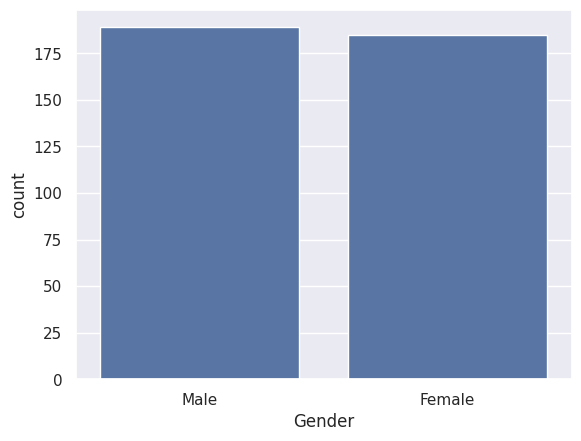

In [87]:
sns.countplot(x=train["Gender"]);

По гистограмме видим, что мужчин и женщин почти одинаковое количество

(array([32., 48., 26., 55., 25., 78., 14., 37., 26., 33.]),
 array([27. , 30.2, 33.4, 36.6, 39.8, 43. , 46.2, 49.4, 52.6, 55.8, 59. ]),
 <BarContainer object of 10 artists>)

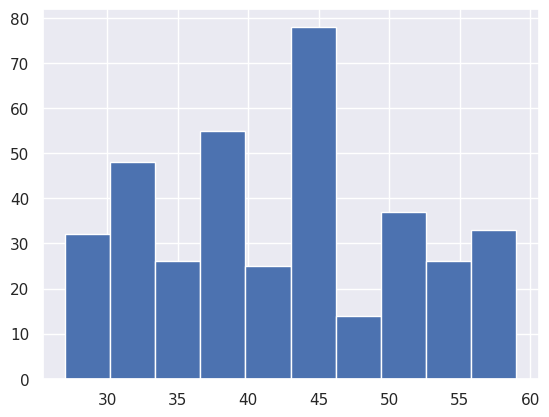

In [88]:
plt.hist(train['Age'])

Возраст большенства людей 45 лет

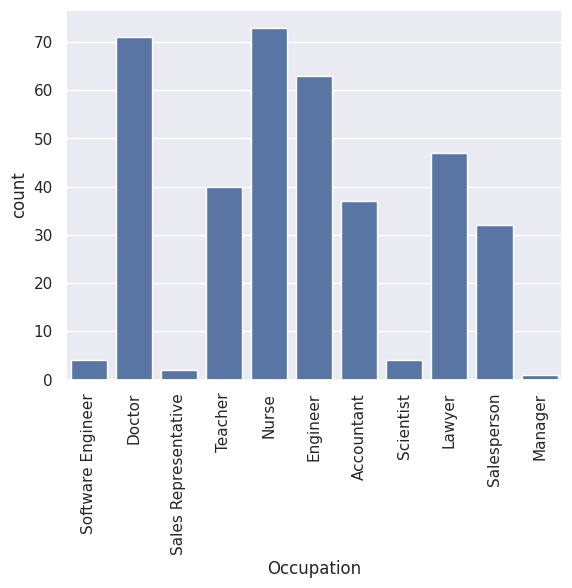

In [98]:
sns.countplot(x=train["Occupation"])
plt.tick_params(axis='x', labelrotation = 90)

По диаграмме можем выделить 3 популярные профессии: Доктор, медсестра и инженер

(array([37., 50., 55., 10., 22., 55., 15., 59., 39., 32.]),
 array([5.8 , 6.07, 6.34, 6.61, 6.88, 7.15, 7.42, 7.69, 7.96, 8.23, 8.5 ]),
 <BarContainer object of 10 artists>)

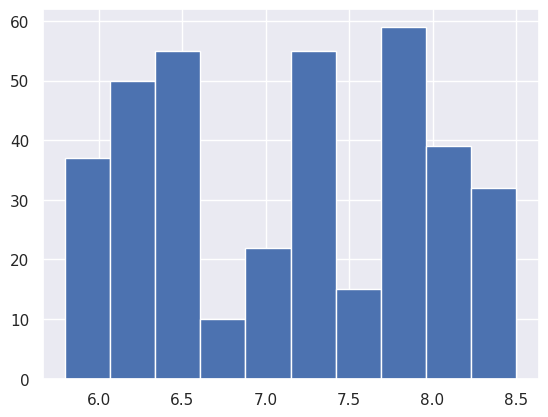

In [101]:
plt.hist(train['Sleep Duration'])

У большенства человек сон около 8 часов

<Axes: xlabel='Quality of Sleep', ylabel='count'>

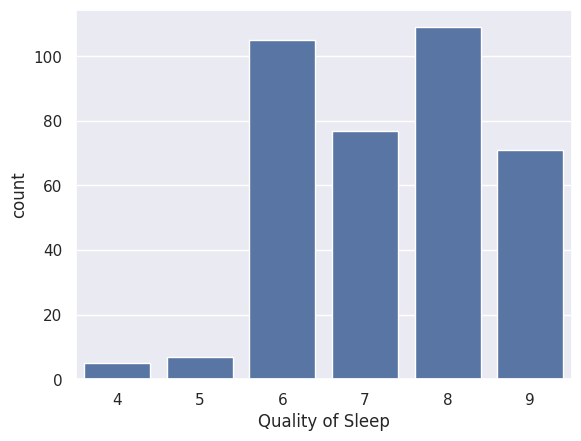

In [102]:
sns.countplot(x=train["Quality of Sleep"])

Большенство оценивает свой сон от 6 до 9

(array([74.,  6., 71.,  4.,  6., 72.,  3., 67.,  2., 69.]),
 array([30., 36., 42., 48., 54., 60., 66., 72., 78., 84., 90.]),
 <BarContainer object of 10 artists>)

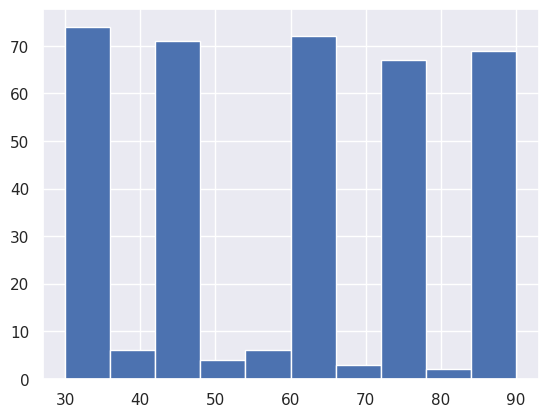

In [104]:
plt.hist(train['Physical Activity Level'])

<Axes: xlabel='Stress Level', ylabel='count'>

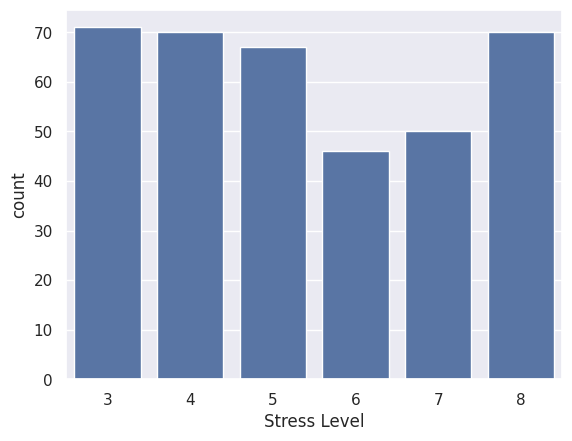

In [105]:
sns.countplot(x=train["Stress Level"])

<Axes: xlabel='BMI Category', ylabel='count'>

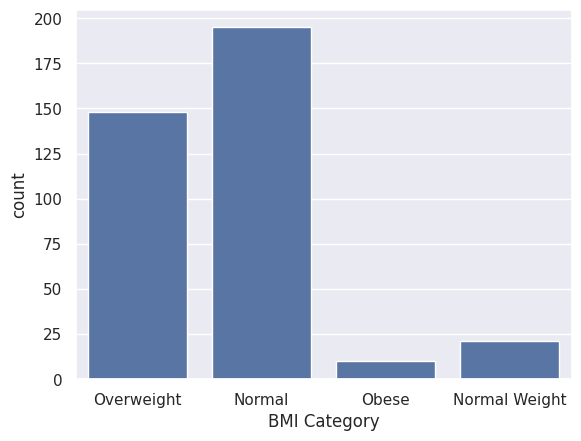

In [117]:
sns.countplot(x=train["BMI Category"])

По диаграмме видим 2 категории с одинаковыми значениями, сделаем замену Normal Weight на Normal

In [128]:
train['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)

<ipython-input-128-001cc5ec5df1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)


In [129]:
train.describe(include=['O'])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,3,25,2
top,Male,Nurse,Normal,130/85,0
freq,189,73,216,99,219


<Axes: xlabel='BMI Category', ylabel='count'>

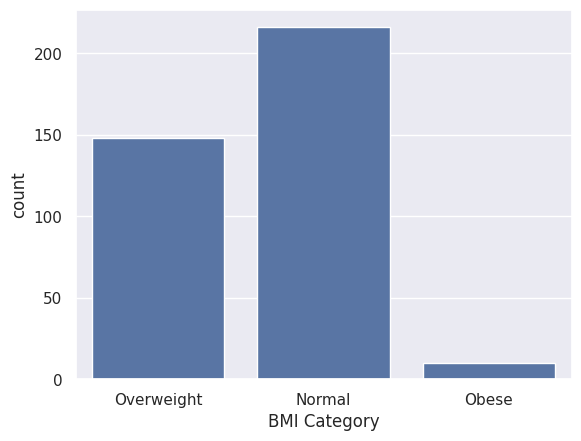

In [131]:
sns.countplot(x=train["BMI Category"])

Людей с нормальным весом большинство, людей с избыточным вес достаточно много

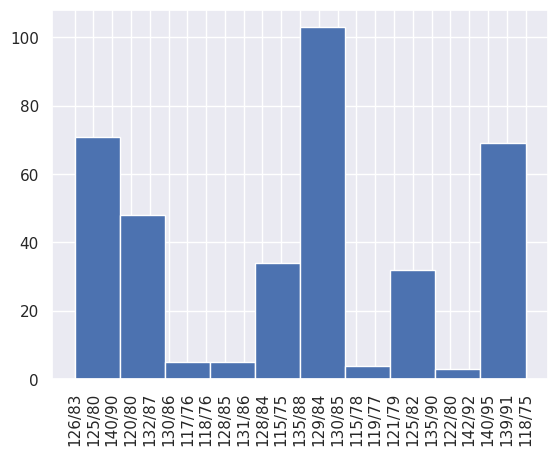

In [135]:
plt.hist(train['Blood Pressure'])
plt.tick_params(axis='x', labelrotation = 90)

(array([69., 96., 76., 71., 38.,  4.,  5.,  5.,  3.,  7.]),
 array([65. , 67.1, 69.2, 71.3, 73.4, 75.5, 77.6, 79.7, 81.8, 83.9, 86. ]),
 <BarContainer object of 10 artists>)

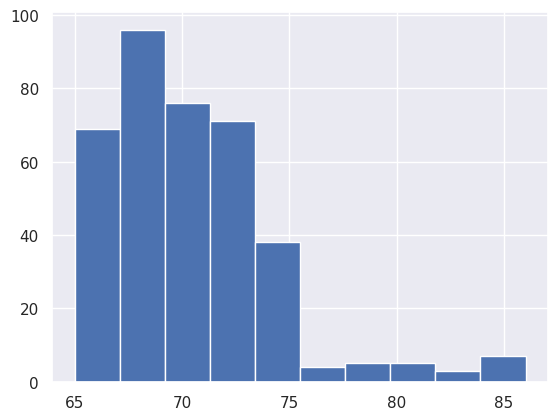

In [138]:
plt.hist(train['Heart Rate'])

У большенства частота сердечных сокращений в состоянии покоя в пределах нормы(65-75)

(array([  8.,   9.,  70.,   8.,  69.,  69.,   4., 101.,   0.,  36.]),
 array([ 3000.,  3700.,  4400.,  5100.,  5800.,  6500.,  7200.,  7900.,
         8600.,  9300., 10000.]),
 <BarContainer object of 10 artists>)

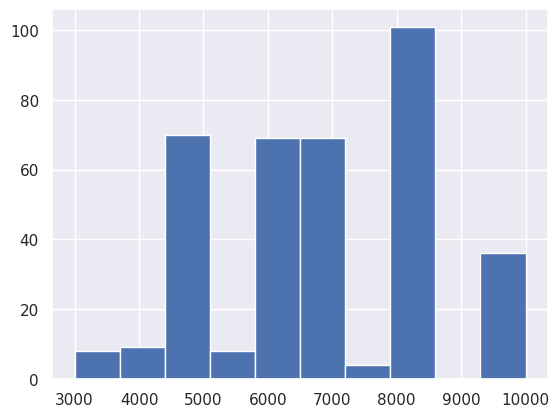

In [139]:
plt.hist(train['Daily Steps'])

Многие люди проходят в день от 5000 до 8000 шагов

<Axes: xlabel='Sleep Disorder', ylabel='count'>

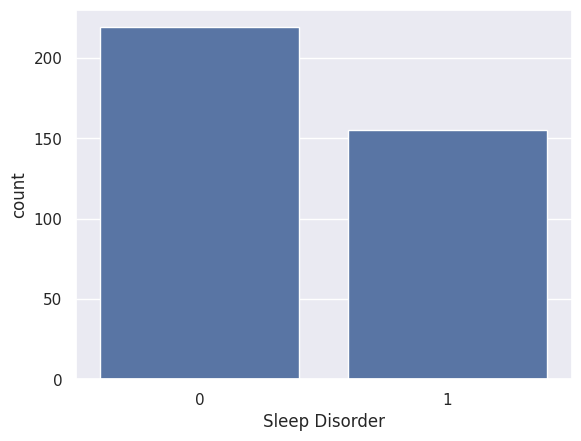

In [143]:
sns.countplot(x=train["Sleep Disorder"])

У большенства нет бессоницы, но более 150 имеют проблемы со сном

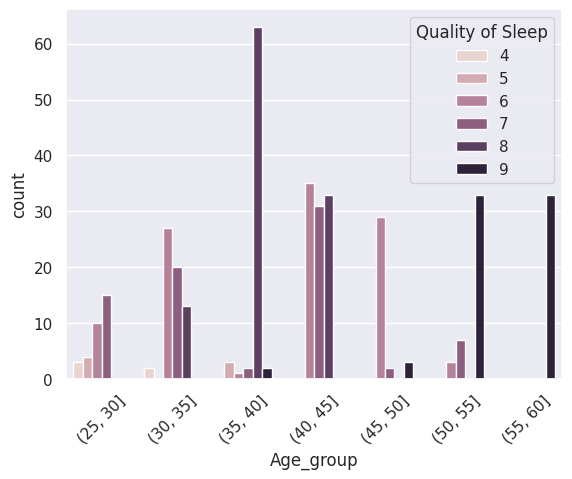

In [148]:
train["Age_group"] = pd.cut(x=train['Age'], bins=[25, 30, 35, 40, 45, 50, 55, 60])
plt.xticks(rotation=45)
sns.countplot(data=train, hue='Quality of Sleep', x='Age_group');

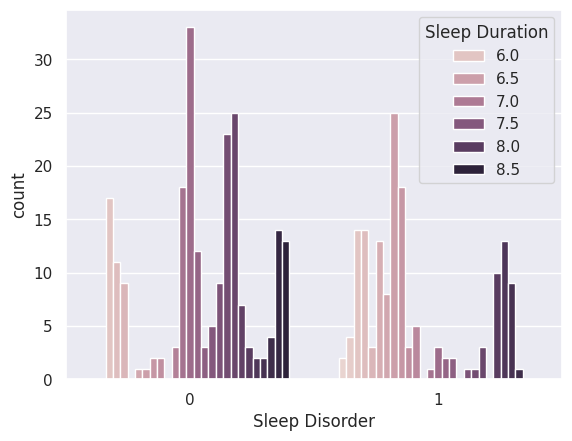

In [154]:
sns.countplot(data=train, hue='Sleep Duration', x='Sleep Disorder');

Чаще у людей с продолжительностью сна более 7 часов не бывает бессонницы

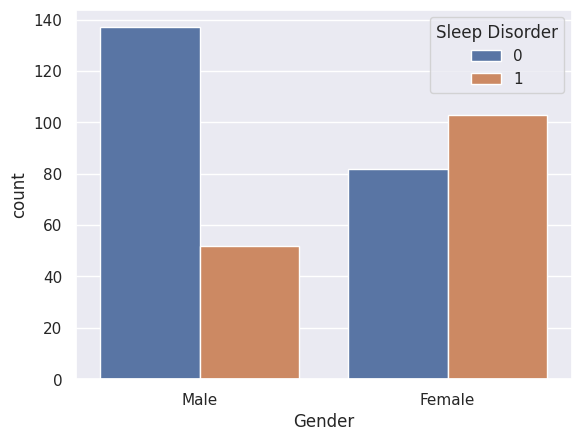

In [156]:
sns.countplot(data=train, hue='Sleep Disorder', x='Gender');

У женщин чаще бывают проблемы со сном

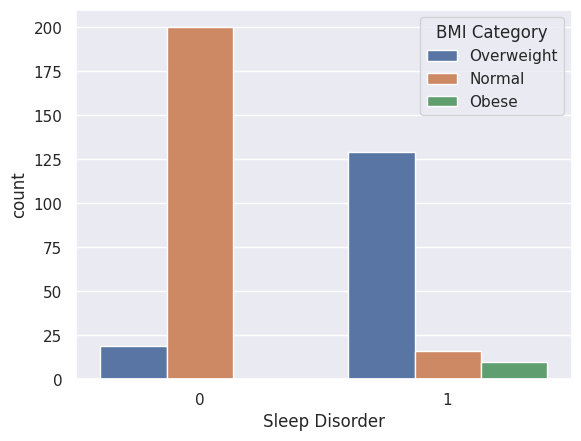

In [157]:
sns.countplot(data=train, hue='BMI Category', x='Sleep Disorder');

Проблемы со сном наблюдаются у людей с избыточным весом и ожирением

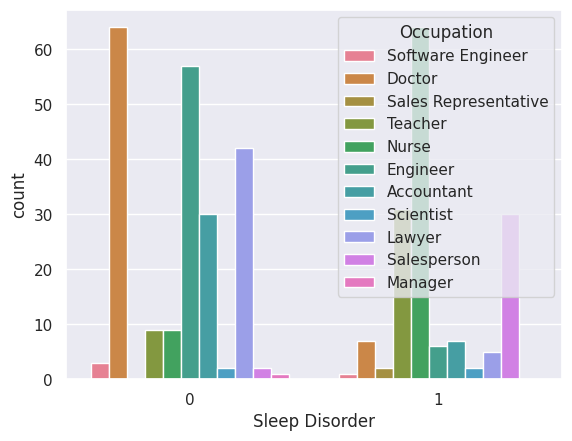

In [162]:
sns.countplot(data=train, hue='Occupation', x='Sleep Disorder');

Многие медсестры, учителя и менеджеры имеют пробле со сном

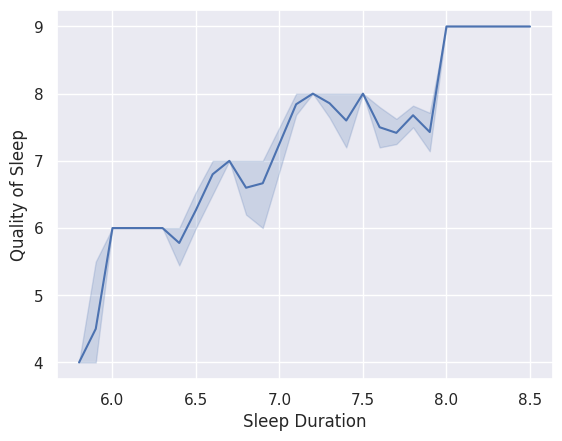

In [164]:
sns.lineplot(data=train, x='Sleep Duration', y='Quality of Sleep');

Оценка качества сна увеличивается вместе с временем сна

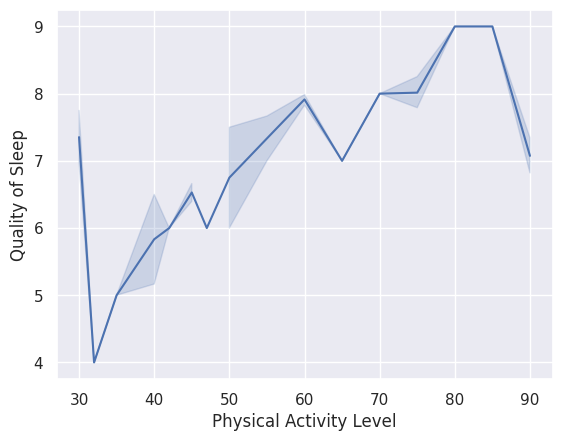

In [166]:
sns.lineplot(data=train, x='Physical Activity Level', y='Quality of Sleep');

Чем больше минут визической активности за день, тем выше оценка качества сна

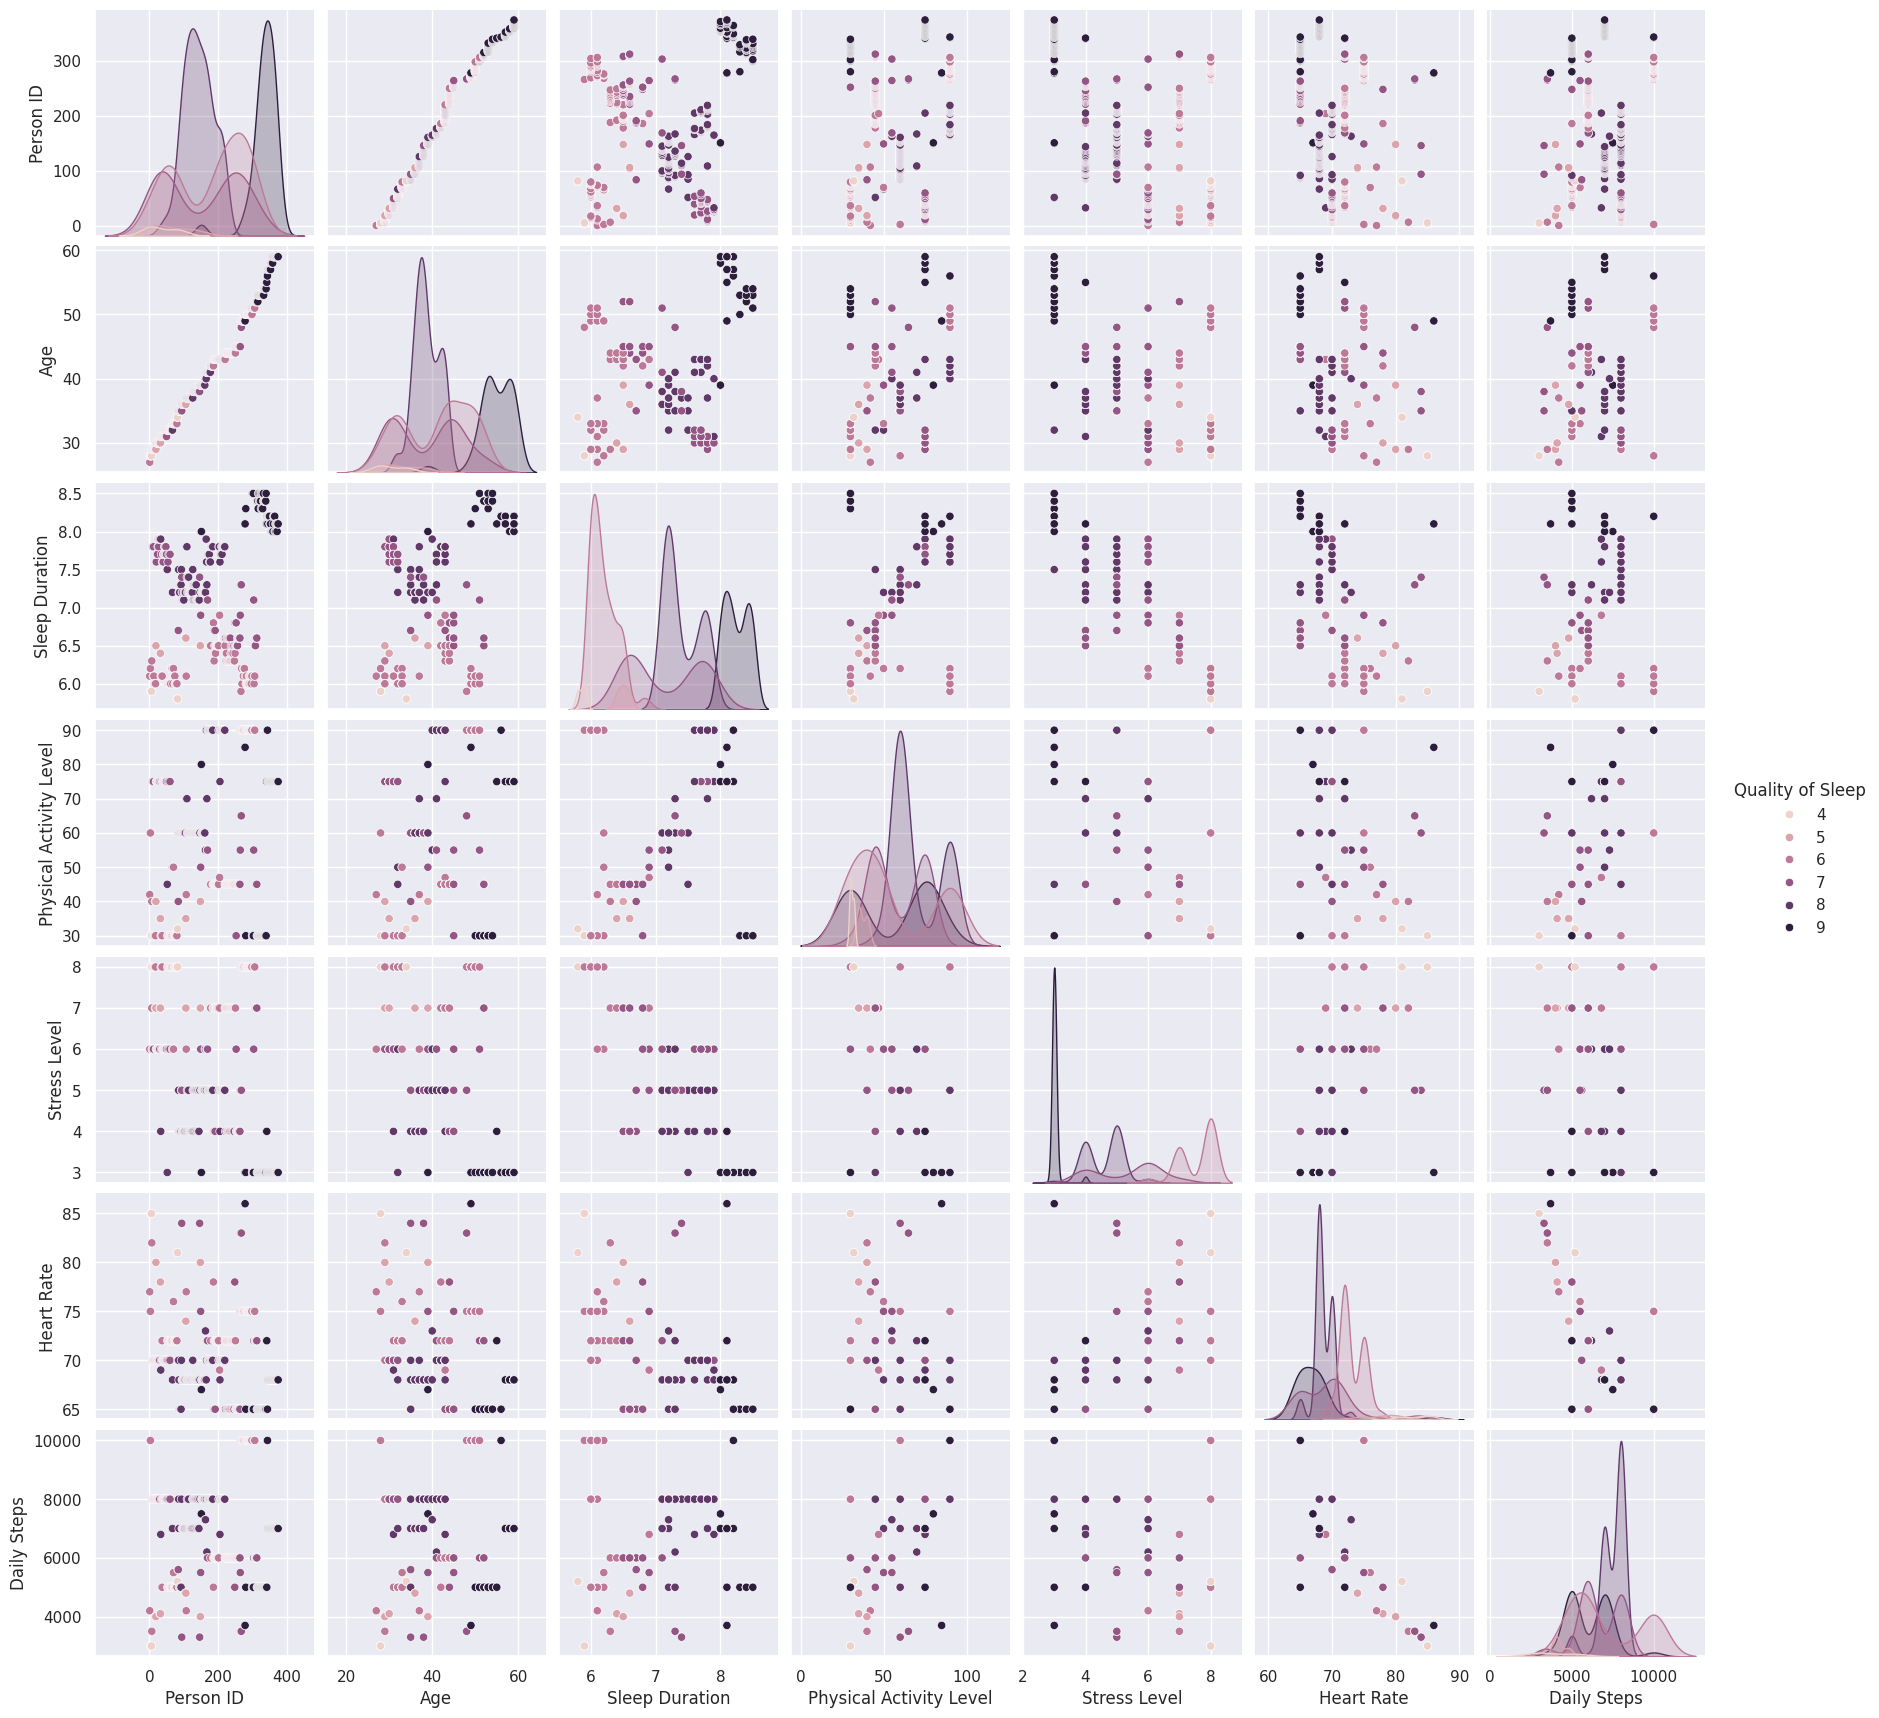

In [146]:
sns.pairplot(train, kind="scatter", hue="Quality of Sleep");

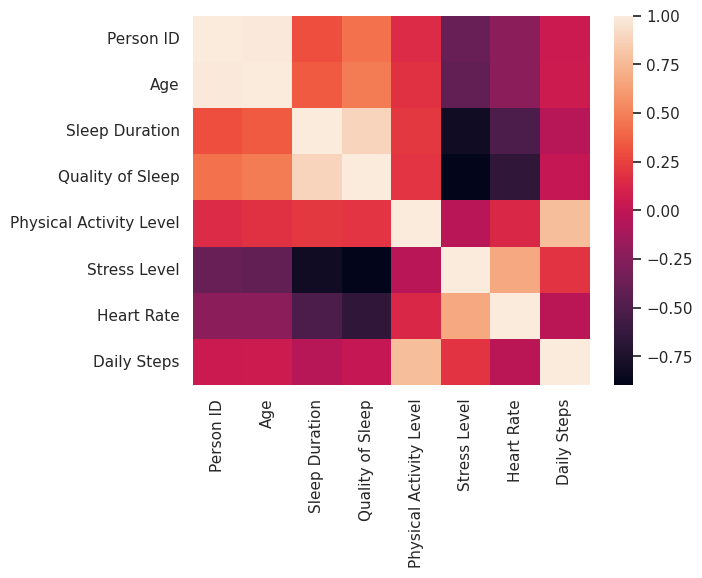

In [167]:
sns.heatmap(train.corr(numeric_only = True));